In [4]:
from bert_functions_v2 import analyzeWord, getBert
from createDims import createPolarDimension
from get_data_from_file import create_lookup_from_data_file,create_lookupFiles_out_of_adjectives_list_using_file
import nltk
from nltk.corpus import wordnet as wn
import numpy as np
import pickle
import json
import string
import ast
import torch
import pandas as pd
import re
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

In [5]:
def preprocess_context(context):
    context=context.split('.')
    for value in context:
        if len(value)<10:
            context.remove(value)
    train_tokens = list(map(lambda t: '[CLS]' +" "+ t, context))
    
    return train_tokens

In [17]:
def create_df(dictionary):
    results=pd.DataFrame()
    results['sentece']=dictionary.keys()
    results['sense_polar']=dictionary.values()
    res=[]
    for value in dictionary.values():
        if value < 0:
            res.append(0)
        else :
            res.append(1)

    results=results.assign(Results= res)

    xs = [0] * 50 + [1]*50

    results=results.assign(Truth= xs)
    
    return results


In [7]:
def SensePolar(file,sentences,out):

    create_lookup_from_data_file(file,out)

    # get the embedding model 
    tokenizer, model = getBert()
    print("Model imported")

    # create the base change matrix (this might take some time)
    createPolarDimension(model, tokenizer, out_path=out, antonym_path=out + "antonym_wordnet_example_sentences_readable_extended.txt")
    print("dimensions created")


    # base change does not work well with only few dimensions -> compare with projection
    antonym_path = out + "polar_dimensions.pkl"

    word = '[CLS]'
    resultsdictionary=defaultdict()
    for sent in sentences:
        
        res=analyzeWord(word, sent, model=model,tokenizer=tokenizer, antonym_path=antonym_path, lookup_path=out, numberPolar=1,method="projection")
        resultsdictionary[sent]=float(list(res[2].values())[0])
        
    return resultsdictionary

In [8]:
def confusion_matrix(df):
    import matplotlib.pyplot as plt
    import numpy
    from sklearn import metrics
    
    actual = df.Truth
    predicted =  df.Results

    confusion_matrix = metrics.confusion_matrix(actual, predicted)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display.plot()
    return plt.show()

In [9]:
def add_values(ant_pair,df,final):
    actual = df.Truth
    predicted =  df.Results
    
    final.loc[len(final)] = [ant_pair,metrics.f1_score(actual, predicted), metrics.recall_score(actual, predicted),  
                             metrics.precision_score(actual, predicted), metrics.accuracy_score(actual, predicted),
                            len(df)]
    
    return final

In [10]:
final=pd.DataFrame()
final=final.assign(Antonym_pair="")
final=final.assign(F1="")
final=final.assign(RECALL="")
final=final.assign(PRESICION="")
final=final.assign(ACCURACY="")
final=final.assign(Number_of_predictions="")



In [11]:
final

,Antonym_pair,F1,RECALL,PRESICION,ACCURACY,Number_of_predictions


# good ---- bad

In [14]:
contextGoodBad="1. The sun beaming down on your face on a beautiful day. 2. The feeling of accomplishment after finishing a difficult task. 3. The taste of warm, freshly baked bread. 4. The sound of waves crashing against the shore. 5. The smell of a fresh bouquet of flowers. 6. The sight of a breathtaking sunrise or sunset. 7. The feeling of a warm hug from a loved one. 8. The taste of a perfectly cooked steak. 9. The sound of laughter from a group of friends. 10. The smell of freshly brewed coffee in the morning. 11. The feeling of sand between your toes on the beach. 12. The sight of a majestic mountain range. 13. The taste of a refreshing glass of iced tea on a hot day. 14. The sound of birds chirping in the morning. 15. The smell of a delicious home-cooked meal. 16. The feeling of a soft, comfortable bed after a long day. 17. The sight of a clear blue sky on a sunny day. 18. The taste of a sweet, juicy watermelon on a summer day. 19. The sound of a crackling fire on a cold winter night. 20. The smell of freshly cut grass on a summer day. 21. The feeling of a cold breeze on a hot summer day. 22. The sight of a rainbow after a storm. 23. The taste of a rich, creamy chocolate dessert. 24. The sound of a favorite song playing on the radio. 25. The smell of freshly washed laundry. 26. The feeling of a warm shower after a workout. 27. The sight of a beautiful, colorful garden. 28. The taste of a savory, perfectly seasoned dish. 29. The sound of a baby's laughter. 30. The smell of a campfire on a camping trip. 31. The feeling of a refreshing swim in a pool or lake. 32. The sight of a full moon on a clear night. 33. The taste of a delicious, homemade dessert. 34. The sound of waves lapping against the shore on a peaceful beach. 35. The smell of fresh-baked cookies from the oven. 36. The feeling of a warm embrace from a loved one. 37. The sight of a field of wildflowers in bloom. 38. The taste of a refreshing, icy cold drink on a hot day. 39. The sound of a waterfall rushing in the distance. 40. The smell of a pine tree forest on a hike.1. The food was so good that I went back for seconds. 2. My friend did a good job on her presentation. 3. It's always a good idea to get a good night's sleep. 4. The weather today is good enough to go for a walk. 5. A good education is important for success in life. 6. She has a good sense of humor and always makes me laugh. 7. The movie we watched last night was really good. 8. It's good to have friends who support and encourage you. 9. A good book can transport you to another world. 10. I'm feeling good about my chances of getting the job.1. The sound of nails scratching on a chalkboard is unbearable. 2. The taste of spoiled food is nauseating. 3. The feeling of a cold sore on your lip is uncomfortable and painful. 4. The sight of a car accident on the highway is distressing. 5. The smell of rotten eggs is revolting. 6. The touch of a slimy, slippery fish can be unpleasant. 7. The taste of cough syrup is bitter and unpleasant. 8. The feeling of a toothache is throbbing and painful. 9. The sight of a spider crawling on your skin is frightening. 10. The smell of cigarette smoke is unpleasant and unhealthy. 11. The touch of a dirty, greasy surface is gross. 12. The taste of burnt food is unpleasant and bitter. 13. The feeling of a migraine headache is debilitating. 14. The sight of a dirty, cluttered room is overwhelming. 15. The smell of a skunk is pungent and overpowering. 16. The touch of a prickly cactus is painful. 17. The taste of spoiled milk is sour and repulsive. 18. The feeling of a bee sting is sharp and painful. 19. The sight of a broken bone is distressing and painful. 20. The smell of rotten garbage is foul and nauseating. 21. The touch of a hot stove is painful and can cause burns. 22. The taste of medicine can be bitter and unpleasant. 23. The feeling of a stomach ache is uncomfortable and painful. 24. The sight of a scary movie can be disturbing and unsettling. 25. The smell of a skid mark on the road is repulsive. 26. The touch of a sticky substance can be unpleasant and hard to remove. 27. The taste of spoiled fruit is mushy and disgusting. 28. The feeling of a sunburn is painful and uncomfortable. 29. The sight of a person being bullied is distressing and sad. 30. The smell of a dead animal is putrid and nauseating. 31. The touch of a thorn on a rose bush can cause pain and scratches. 32. The taste of food that's too spicy can be overwhelming and uncomfortable. 33. The feeling of a broken heart is emotional and painful. 34. The sight of a natural disaster can be devastating and frightening. 35. The smell of sewage is revolting and nauseating. 36. The touch of poison ivy can cause an itchy and painful rash. 37. The taste of burnt coffee is bitter and unpleasant. 38. The feeling of a hangover is uncomfortable and painful. 39. The sight of a dead animal on the side of the road is sad and disturbing. 40. The smell of a skunk spray is overpowering and nauseating. 41. The touch of a dirty public restroom is gross and unsanitary. 42. The taste of spoiled meat is rancid and disgusting. 43. The feeling of a broken bone is painful and can cause long-term damage. 44. The sight of a person being mistreated is distressing and upsetting. 45. The smell of a musty basement is unpleasant and unhealthy. 46. The touch of a wet, dirty dog can be unpleasant and messy. 47. The taste of a burnt tongue from hot food is uncomfortable and painful. 48. The feeling of a sprained ankle is painful and can limit mobility. 49. The sight of a person getting hurt is distressing and can be traumatic. 50. The smell of a dumpster is putrid and nauseating."

In [15]:
train_sentences=preprocess_context(contextGoodBad)

In [16]:
len(train_sentences)

100

In [18]:
train_sentences

['[CLS]  The sun beaming down on your face on a beautiful day',
 '[CLS]  The feeling of accomplishment after finishing a difficult task',
 '[CLS]  The taste of warm, freshly baked bread',
 '[CLS]  The sound of waves crashing against the shore',
 '[CLS]  The smell of a fresh bouquet of flowers',
 '[CLS]  The sight of a breathtaking sunrise or sunset',
 '[CLS]  The feeling of a warm hug from a loved one',
 '[CLS]  The taste of a perfectly cooked steak',
 '[CLS]  The sound of laughter from a group of friends',
 '[CLS]  The smell of freshly brewed coffee in the morning',
 '[CLS]  The feeling of sand between your toes on the beach',
 '[CLS]  The sight of a majestic mountain range',
 '[CLS]  The taste of a refreshing glass of iced tea on a hot day',
 '[CLS]  The sound of birds chirping in the morning',
 '[CLS]  The smell of a delicious home-cooked meal',
 '[CLS]  The feeling of a soft, comfortable bed after a long day',
 '[CLS]  The sight of a clear blue sky on a sunny day',
 '[CLS]  The tas

In [19]:
dictionary=SensePolar('good_bad.xlsx',train_sentences,'antonyms_file/')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Model imported
Start forwarding the Polar opposites ...
dimensions created
Analyzing the word:  [CLS]
In the context of:  [CLS]  The sun beaming down on your face on a beautiful day
Top:  1
Dimension:  good<------>bad
Definitions:   <------> 
Value: -1.42976


Analyzing the word:  [CLS]
In the context of:  [CLS]  The feeling of accomplishment after finishing a difficult task
Top:  1
Dimension:  good<------>bad
Definitions:   <------> 
Value: -0.96005


Analyzing the word:  [CLS]
In the context of:  [CLS]  The taste of warm, freshly baked bread
Top:  1
Dimension:  good<------>bad
Definitions:   <------> 
Value: -0.38743952


Analyzing the word:  [CLS]
In the context of:  [CLS]  The sound of waves crashing against the shore
Top:  1
Dimension:  good<------>bad
Definitions:   <------> 
Value:                      0.088038534


Analyzing the word:  [CLS]
In the context of:  [CLS]  The smell of a fresh bouquet of flowers
Top:  1
Dimension:  good<------>bad
Definitions:   <------> 
Value:    

Top:  1
Dimension:  good<------>bad
Definitions:   <------> 
Value: -0.71001065


Analyzing the word:  [CLS]
In the context of:  [CLS]  A good education is important for success in life
Top:  1
Dimension:  good<------>bad
Definitions:   <------> 
Value: -2.0572186


Analyzing the word:  [CLS]
In the context of:  [CLS]  She has a good sense of humor and always makes me laugh
Top:  1
Dimension:  good<------>bad
Definitions:   <------> 
Value: -0.06503613


Analyzing the word:  [CLS]
In the context of:  [CLS]  The movie we watched last night was really good
Top:  1
Dimension:  good<------>bad
Definitions:   <------> 
Value:                      0.104237646


Analyzing the word:  [CLS]
In the context of:  [CLS]  It's good to have friends who support and encourage you
Top:  1
Dimension:  good<------>bad
Definitions:   <------> 
Value: -1.2222522


Analyzing the word:  [CLS]
In the context of:  [CLS]  A good book can transport you to another world
Top:  1
Dimension:  good<------>bad
Definiti

Top:  1
Dimension:  good<------>bad
Definitions:   <------> 
Value:                      0.135818


Analyzing the word:  [CLS]
In the context of:  [CLS]  The taste of burnt coffee is bitter and unpleasant
Top:  1
Dimension:  good<------>bad
Definitions:   <------> 
Value:                      0.07246435


Analyzing the word:  [CLS]
In the context of:  [CLS]  The feeling of a hangover is uncomfortable and painful
Top:  1
Dimension:  good<------>bad
Definitions:   <------> 
Value: -0.17284687


Analyzing the word:  [CLS]
In the context of:  [CLS]  The sight of a dead animal on the side of the road is sad and disturbing
Top:  1
Dimension:  good<------>bad
Definitions:   <------> 
Value: -0.32734522


Analyzing the word:  [CLS]
In the context of:  [CLS]  The smell of a skunk spray is overpowering and nauseating
Top:  1
Dimension:  good<------>bad
Definitions:   <------> 
Value:                      0.45363334


Analyzing the word:  [CLS]
In the context of:  [CLS]  The touch of a dirty publ

In [21]:
dictionary

defaultdict(None,
            {'[CLS]  The sun beaming down on your face on a beautiful day': -1.4297599792480469,
             '[CLS]  The feeling of accomplishment after finishing a difficult task': -0.9600499868392944,
             '[CLS]  The taste of warm, freshly baked bread': -0.3874395191669464,
             '[CLS]  The sound of waves crashing against the shore': 0.08803853392601013,
             '[CLS]  The smell of a fresh bouquet of flowers': 0.052371252328157425,
             '[CLS]  The sight of a breathtaking sunrise or sunset': -0.6081768274307251,
             '[CLS]  The feeling of a warm hug from a loved one': -0.2139492630958557,
             '[CLS]  The taste of a perfectly cooked steak': 0.01492597721517086,
             '[CLS]  The sound of laughter from a group of friends': 0.16014394164085388,
             '[CLS]  The smell of freshly brewed coffee in the morning': -0.27705737948417664,
             '[CLS]  The feeling of sand between your toes on the beach': -0

In [22]:
good_badDF=create_df(dictionary)

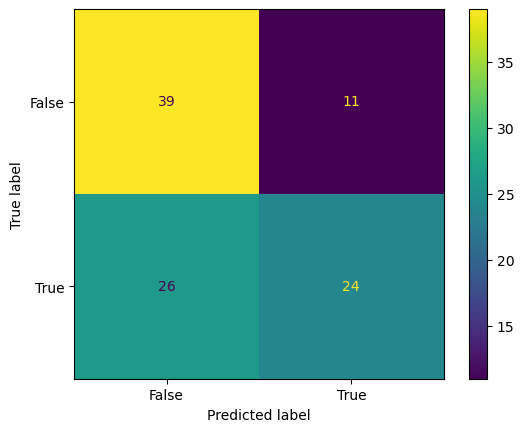

In [23]:
confusion_matrix(good_badDF)

In [24]:
add_values('good-bad',good_badDF,final)

,Antonym_pair,F1,RECALL,PRESICION,ACCURACY,Number_of_predictions
0,good-bad,0.564706,0.48,0.685714,0.63,100


# happy---sad

In [18]:
contextHappySad="1. Her face lit up with a joyful smile.2. The sun was shining and birds were chirping, making her feel content.3. He felt a sense of elation when he accomplished his goal.4. The feeling of accomplishment brought her great happiness.5. She couldn't help but feel overjoyed about her upcoming vacation.6. Seeing her loved ones happy made her heart swell with joy.7. The laughter and chatter of friends made for a happy atmosphere.8. The delicious food and good company put him in a great mood.9. The satisfaction of completing a task brought a huge grin to her face.10. The cute puppy wagging its tail made her feel blissful.11. A warm hug from a loved one brought her immense happiness.12. The excitement of starting a new adventure made him feel giddy with joy.13. A successful day at work made her feel fulfilled and happy.14. The sound of children's laughter was music to her ears, making her happy.15. Dancing to her favorite song made her feel carefree and happy.16. The smell of fresh flowers put a smile on her face and made her happy.17. The warm sunshine and gentle breeze made for a perfect day, bringing joy.18. The feeling of love and acceptance from others made her feel happy and grateful.19. The delicious taste of her favorite dessert made her feel happy and content.20. Being surrounded by nature's beauty brought her peace and happiness.1. The old man sat alone in his dark and dingy apartment, reminiscing about the wife he lost many years ago.2. The abandoned puppy sat in the corner, trembling with fear and loneliness.3. The young girl stood at her mother's grave, tears streaming down her face.4. The soldier returned from war, only to find out that his wife had moved on and started a new life without him.5. The homeless man begged for money on the street corner, with no one to turn to for help.6. The abandoned child sat in the foster home, longing for a family to call his own.7. The cancer patient lay in the hospital bed, knowing that her time was running out.8. The elderly couple sat in the nursing home, their children too busy to visit them.9. The family mourned the loss of their beloved pet, who had been a loyal companion for many years.10. The victim of domestic abuse sat in silence, too afraid to speak out against her abuser.11. The young boy sat alone on the playground, watching the other children play and wishing he could join in.12. The immigrant family struggled to make ends meet in a new country, with no support from their loved ones back home.13. The student failed his exams, knowing that his dreams of a bright future had been shattered.14. The single mother worked two jobs, struggling to provide for her children and make ends meet.15. The elderly woman sat in her rocking chair, mourning the loss of her husband and the life they had shared together.16. The victim of a hit and run accident lay on the street, with no one stopping to help.17. The family of a missing person waited anxiously for news, not knowing if their loved one was alive or dead.18. The young girl was bullied at school, with no one to turn to for help or support.19. The victim of a natural disaster lost everything they owned, with no way to rebuild their life.20. The family of a terminally ill child struggled to come to terms with the fact that their chi"

In [19]:
train_sentences=preprocess_context(contextHappySad)

In [20]:
train_sentences

['[CLS]  Her face lit up with a joyful smile',
 '[CLS]  The sun was shining and birds were chirping, making her feel content',
 '[CLS]  He felt a sense of elation when he accomplished his goal',
 '[CLS]  The feeling of accomplishment brought her great happiness',
 "[CLS]  She couldn't help but feel overjoyed about her upcoming vacation",
 '[CLS]  Seeing her loved ones happy made her heart swell with joy',
 '[CLS]  The laughter and chatter of friends made for a happy atmosphere',
 '[CLS]  The delicious food and good company put him in a great mood',
 '[CLS]  The satisfaction of completing a task brought a huge grin to her face',
 '[CLS]  The cute puppy wagging its tail made her feel blissful',
 '[CLS]  A warm hug from a loved one brought her immense happiness',
 '[CLS]  The excitement of starting a new adventure made him feel giddy with joy',
 '[CLS]  A successful day at work made her feel fulfilled and happy',
 "[CLS]  The sound of children's laughter was music to her ears, making her 

In [21]:
len(train_sentences)

40

In [22]:
dictionary=SensePolar('happy_sad.xlsx',train_sentences,'antonyms_file/')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Model imported
Start forwarding the Polar opposites ...
dimensions created
Analyzing the word:  [CLS]
In the context of:  [CLS]  Her face lit up with a joyful smile
Top:  1
Dimension:  happy<------>sad
Definitions:   <------> 
Value: -1.2434444


Analyzing the word:  [CLS]
In the context of:  [CLS]  The sun was shining and birds were chirping, making her feel content
Top:  1
Dimension:  happy<------>sad
Definitions:   <------> 
Value: -1.2001888


Analyzing the word:  [CLS]
In the context of:  [CLS]  He felt a sense of elation when he accomplished his goal
Top:  1
Dimension:  happy<------>sad
Definitions:   <------> 
Value: -1.0685772


Analyzing the word:  [CLS]
In the context of:  [CLS]  The feeling of accomplishment brought her great happiness
Top:  1
Dimension:  happy<------>sad
Definitions:   <------> 
Value: -1.4496535


Analyzing the word:  [CLS]
In the context of:  [CLS]  She couldn't help but feel overjoyed about her upcoming vacation
Top:  1
Dimension:  happy<------>sad
Defin

Top:  1
Dimension:  happy<------>sad
Definitions:   <------> 
Value: -0.24857664


Analyzing the word:  [CLS]
In the context of:  [CLS]  The family of a terminally ill child struggled to come to terms with the fact that their chi
Top:  1
Dimension:  happy<------>sad
Definitions:   <------> 
Value: -0.041592088




In [23]:
happy_sad_df=create_df(dictionary)

In [24]:
happy_sad_df

,sentece,sense_polar,Results,Truth
0,[CLS] Her face lit up with a joyful smile,-1.243444,0,0
1,[CLS] The sun was shining and birds were chir...,-1.200189,0,0
2,[CLS] He felt a sense of elation when he acco...,-1.068577,0,0
3,[CLS] The feeling of accomplishment brought h...,-1.449654,0,0
4,[CLS] She couldn't help but feel overjoyed ab...,-1.396667,0,0
5,[CLS] Seeing her loved ones happy made her he...,-1.359378,0,0
6,[CLS] The laughter and chatter of friends mad...,-1.302101,0,0
7,[CLS] The delicious food and good company put...,-1.018857,0,0
8,[CLS] The satisfaction of completing a task b...,-1.510369,0,0
9,[CLS] The cute puppy wagging its tail made he...,-1.367859,0,0


In [25]:
add_values('happy-sad',happy_sad_df,final)

,Antonym_pair,F1,RECALL,PRESICION,ACCURACY,Number_of_predictions
0,good-bad,1.00000,1.00,1.0,1.000,40
1,happy-sad,0.26087,0.15,1.0,0.575,40


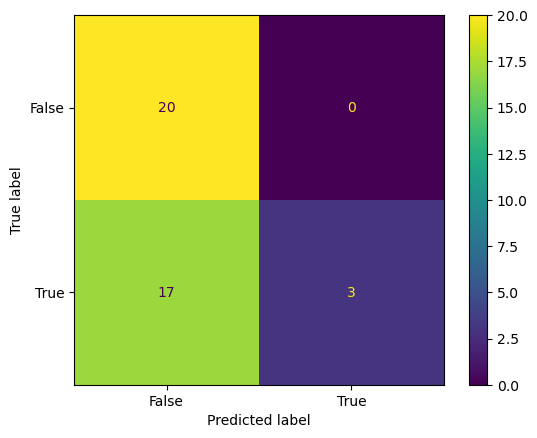

In [26]:
confusion_matrix(happy_sad_df)

# hot-cold


In [27]:
contextHotCold="1. The sun was scorching and made me sweat profusely.2. The coffee was steaming and burned my tongue as I sipped it.3. The sand was blazing and made it uncomfortable to walk barefoot.4. The chili peppers had a fiery flavor that made my mouth tingle.5. The fireplace was roaring and gave off a comforting warmth.6. The curry had a spicy kick that made my nose run.7. The sauna was sweltering and made me feel like I was detoxing.8. The coffee mug was warm and comforting to hold in my hands.9. The firepit was blazing and provided a cozy gathering spot.10. The oven was sizzling and filled the kitchen with delicious aromas.11. The tea was piping hot and made me feel refreshed.12. The soup was simmering and filled the room with a savory scent.13. The steam rising from the pot was intense and made my skin feel dewy.14. The peppers in the stir fry had a zesty flavor that made my taste buds dance.15. The sauna was humid and made me feel like I was in a tropical jungle.16. The candles were flickering and gave off a warm and welcoming glow.17. The lava from the volcano was molten and destroyed everything in its path.18. The summer sun was scorching and made me seek shade.19. The spices in the dish were piquant and added a bold flavor to the meal.20. The oven mitts were warm and protected my hands from the heat of the oven.1. The icy wind cut through my jacket like a razor.2. The chilled water numbed my fingertips.3. The freezing air made my breath visible.4. The frosty ground crackled beneath my boots.5. The shivering trees stood motionless.6. The frigid temperature made my teeth chatter.7. The nippy breeze gave me goosebumps.8. The gelid air made my nose run.9. The chilly night sky was filled with twinkling stars.10. The wintry landscape was covered in a blanket of snow.11. The icy rain turned everything into a slippery mess.12. The snowflakes fell gently, creating a serene atmosphere.13. The frozen lake was a shimmering sheet of ice.14. The biting wind made me pull my coat tighter.15. The frost-covered leaves looked like delicate sculptures.16. The icy mist enveloped the mountains in an eerie haze.17. The icy river flowed silently through the valley.18. The frost on the windowpanes made intricate patterns.19. The chilly morning air made my eyes water.20. The frozen icicles hung from the roof like fragile crystals."

In [28]:
train_sentences=preprocess_context(contextHotCold)

In [29]:
len(train_sentences)

40

In [30]:
dictionary=SensePolar('hot_cold.xlsx',train_sentences,'antonyms_file/')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Model imported
Start forwarding the Polar opposites ...
dimensions created
Analyzing the word:  [CLS]
In the context of:  [CLS]  The sun was scorching and made me sweat profusely
Top:  1
Dimension:  hot<------>cold
Definitions:   <------> 
Value: -0.400082


Analyzing the word:  [CLS]
In the context of:  [CLS]  The coffee was steaming and burned my tongue as I sipped it
Top:  1
Dimension:  hot<------>cold
Definitions:   <------> 
Value: -0.5597641


Analyzing the word:  [CLS]
In the context of:  [CLS]  The sand was blazing and made it uncomfortable to walk barefoot
Top:  1
Dimension:  hot<------>cold
Definitions:   <------> 
Value: -0.7322453


Analyzing the word:  [CLS]
In the context of:  [CLS]  The chili peppers had a fiery flavor that made my mouth tingle
Top:  1
Dimension:  hot<------>cold
Definitions:   <------> 
Value: -0.8767381


Analyzing the word:  [CLS]
In the context of:  [CLS]  The fireplace was roaring and gave off a comforting warmth
Top:  1
Dimension:  hot<------>cold


In [31]:
hot_cold_df=create_df(dictionary)

In [32]:
add_values('hot-cold',hot_cold_df,final)

,Antonym_pair,F1,RECALL,PRESICION,ACCURACY,Number_of_predictions
0,good-bad,1.00000,1.00,1.0,1.000,40
1,happy-sad,0.26087,0.15,1.0,0.575,40
2,hot-cold,0.75000,0.60,1.0,0.800,40


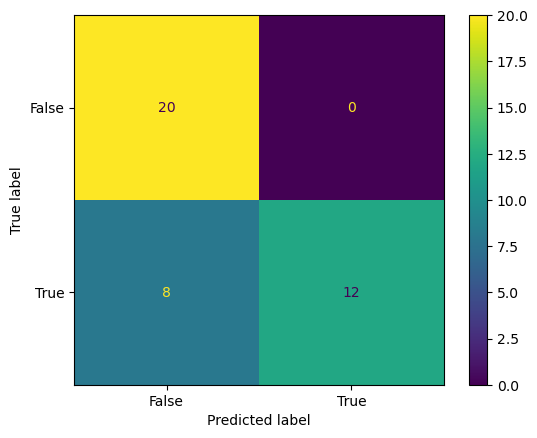

In [33]:
confusion_matrix(hot_cold_df)

# difficult --- easy 

In [34]:
context="1. The task at hand required immense effort and concentration. 2. It was no easy feat to accomplish what was being asked. 3. The challenge ahead was daunting and required a lot of perseverance. 4. The project was complex and required a great deal of problem-solving. 5. The situation demanded a significant amount of skill and attention. 6. The process was intricate and required careful attention to detail. 7. The task was arduous and required a lot of hard work. 8. It was a demanding task that required a lot of dedication. 9. The job was taxing and required a lot of energy. 10. The situation was delicate and required a lot of finesse. 11. The project was formidable and required a lot of courage. 12. The task was challenging and required a lot of creativity. 13. It was a strenuous task that required a lot of physical effort. 14. The job was intricate and required a lot of precision. 15. The situation was complex and required a lot of analysis.1. This math problem is very difficult to solve. 2. Climbing Mount Everest is a difficult task. 3. Learning a new language can be difficult, but it's worth it. 4. It is difficult to understand the complexities of the human brain. 5. Writing a novel is a difficult and time-consuming process.1. Learning a new language is not easy, but with practice, it can become easier. 2. It's easy to get lost in a new city, so it's important to have a map or GPS. 3. Cooking a gourmet meal may seem difficult, but with the right recipe, it can be easy. 4. It's easy to procrastinate, but it's important to stay focused on your goals. 5. Making a decision is never easy, especially when there are so many options.1. The task at hand requires little effort and can be accomplished quickly. 2. It's a breeze to complete the project with the right tools and resources. 3. The activity is so simple that even a child could do it. 4. The solution to the problem is straightforward and requires minimal thinking. 5. The process is uncomplicated and can be done in a few simple steps. 6. The task is so effortless that it can be done without breaking a sweat. 7. The task is not challenging and can be completed with minimal supervision. 8. The activity is so undemanding that it can be done while multitasking. 9. The solution is so obvious that it doesn't require much brainstorming. 10. The task is so straightforward that it can be done on autopilot. 11. The activity is so simple that it can be done without any specialized skills. 12. The task is so manageable that it can be completed in a short amount of time. 13. The solution is so clear that it can be implemented without any further discussion. 14. The activity is so effortless that it can be done while relaxing. 15. The task is so uncomplicated that it can be done without any prior training."

In [35]:
train_sentences=preprocess_context(context)

In [36]:
len(train_sentences)

40

In [37]:
dictionary=SensePolar('difficult_easy.xlsx',train_sentences,'antonyms_file/')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Model imported
Start forwarding the Polar opposites ...
dimensions created
Analyzing the word:  [CLS]
In the context of:  [CLS]  The task at hand required immense effort and concentration
Top:  1
Dimension:  difficult<------>easy
Definitions:   <------> 
Value: -1.2393439


Analyzing the word:  [CLS]
In the context of:  [CLS]  It was no easy feat to accomplish what was being asked
Top:  1
Dimension:  difficult<------>easy
Definitions:   <------> 
Value: -1.1815522


Analyzing the word:  [CLS]
In the context of:  [CLS]  The challenge ahead was daunting and required a lot of perseverance
Top:  1
Dimension:  difficult<------>easy
Definitions:   <------> 
Value: -0.75620186


Analyzing the word:  [CLS]
In the context of:  [CLS]  The project was complex and required a great deal of problem-solving
Top:  1
Dimension:  difficult<------>easy
Definitions:   <------> 
Value: -0.7658546


Analyzing the word:  [CLS]
In the context of:  [CLS]  The situation demanded a significant amount of skill an

Top:  1
Dimension:  difficult<------>easy
Definitions:   <------> 
Value: -1.413902




In [38]:
difficult_easy_df=create_df(dictionary)

In [39]:
add_values('difficult-easy',difficult_easy_df,final)

,Antonym_pair,F1,RECALL,PRESICION,ACCURACY,Number_of_predictions
0,good-bad,1.000000,1.00,1.0,1.000,40
1,happy-sad,0.260870,0.15,1.0,0.575,40
2,hot-cold,0.750000,0.60,1.0,0.800,40
3,difficult-easy,0.090909,0.05,0.5,0.500,40


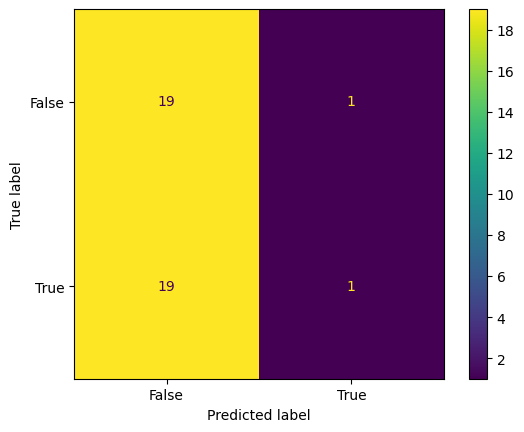

In [40]:
confusion_matrix(difficult_easy_df)

# big-small

In [41]:
context="1. The towering skyscraper stretched towards the sky. 2. The massive elephant trampled through the jungle. 3. The expansive ocean seemed to have no end in sight. 4. The colossal mountain range loomed in the distance. 5. The grandiose cathedral was a sight to behold. 6. The prodigious ship sailed across the vast sea. 7. The monumental statue stood proudly in the city center. 8. The immense forest was a maze of towering trees. 9. The substantial whale breached the surface of the water. 10. The extensive desert was a sea of sand as far as the eye could see. 11. The impressive glacier stretched for miles. 12. The gigantic boulder blocked the path completely. 13. The towering bridge spanned across the wide river. 14. The massive meteorite left a crater miles wide. 15. The grand palace was fit for a king and his court.1. The big elephant trumpeted loudly as it walked through the savannah. 2. The big, fluffy dog wagged its tail excitedly when its owner arrived home. 3. The big, ominous storm cloud loomed over the horizon, threatening to unleash its fury. 4. The big, luxurious yacht sailed gracefully through the open sea. 5. The big, sprawling city was a maze of skyscrapers and bustling streets.1. The small kitten curled up in the warm sunbeam. 2. A small bird chirped from the tree branch above. 3. The small town was nestled in the rolling hills. 4. She wore a small pendant around her neck. 5. The small flower bloomed brightly in the garden.1. The tiny teacup fit perfectly in her hand. 2. The little seedling emerged from the soil. 3. The miniature figurine was intricately detailed. 4. The petite ring sparkled on her finger. 5. The baby bird was barely visible in the nest. 6. The dainty butterfly landed on the flower petal. 7. The compact camera captured stunning photos. 8. The wee mouse scurried across the floor. 9. The delicate snowflake melted on her fingertip. 10. The slim pencil wrote in fine lines. 11. The fine thread was barely visible to the eye. 12. The minute bug crawled along the leaf. 13. The slender blade sliced through the bread. 14. The diminutive toy car zoomed across the floor. 15. The tiny book fit in the palm of her hand."

In [42]:
train_sentences=preprocess_context(context)

In [43]:
len(train_sentences)

40

In [44]:
dictionary=SensePolar('big_small.xlsx',train_sentences,'antonyms_file/')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Model imported
Start forwarding the Polar opposites ...
dimensions created
Analyzing the word:  [CLS]
In the context of:  [CLS]  The towering skyscraper stretched towards the sky
Top:  1
Dimension:  big<------>small
Definitions:   <------> 
Value: -0.41442862


Analyzing the word:  [CLS]
In the context of:  [CLS]  The massive elephant trampled through the jungle
Top:  1
Dimension:  big<------>small
Definitions:   <------> 
Value:                      0.26825824


Analyzing the word:  [CLS]
In the context of:  [CLS]  The expansive ocean seemed to have no end in sight
Top:  1
Dimension:  big<------>small
Definitions:   <------> 
Value:                      0.23456033


Analyzing the word:  [CLS]
In the context of:  [CLS]  The colossal mountain range loomed in the distance
Top:  1
Dimension:  big<------>small
Definitions:   <------> 
Value: -0.053240187


Analyzing the word:  [CLS]
In the context of:  [CLS]  The grandiose cathedral was a sight to behold
Top:  1
Dimension:  big<------>smal

In [45]:
big_small_df=create_df(dictionary)
add_values('big-small',big_small_df,final)

,Antonym_pair,F1,RECALL,PRESICION,ACCURACY,Number_of_predictions
0,good-bad,1.000000,1.00,1.000000,1.000,40
1,happy-sad,0.260870,0.15,1.000000,0.575,40
2,hot-cold,0.750000,0.60,1.000000,0.800,40
3,difficult-easy,0.090909,0.05,0.500000,0.500,40
4,big-small,0.761905,0.80,0.727273,0.750,40


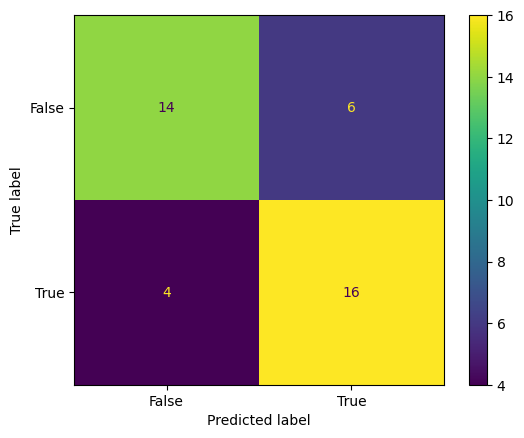

In [46]:
confusion_matrix(big_small_df)

# Fast - Slow 

In [47]:
context="1. The cheetah raced across the savannah in a blur. 2. The race car zoomed past the finish line in a flash. 3. The hare sprinted ahead of the tortoise with ease. 4. The roller coaster hurtled down the track at breakneck speed. 5. The windsurfing board skimmed over the waves effortlessly. 6. The rocket shot into space with incredible velocity. 7. The motorcycle roared down the highway leaving dust in its wake. 8. The speedboat sliced through the water like a knife.10. The bullet train streaked through the countryside in a blur. 11. The fighter jet soared through the sky at supersonic speed. 12. The downhill skier hurtled down the slope with incredible momentum. 13. The greyhound raced around the track with lightning agility. 14. The bobsled hurtled down the icy track at dizzying speed. 15. The Formula One car flew around the racetrack with remarkable swiftness.30. The fast-approaching exam had the students studying feverishly, hoping to do well. 31. The fast-moving stock market was a source of excitement and anxiety for investors. 32. The fast-drying paint allowed the decorator to finish the job quickly and efficiently. 33. The fast-moving conveyor belt at the airport moved the luggage from one place to another in a matter of seconds. 34. The fast-revolving merry-go-round made the children giggle with delight as they rode on it. 35. The fast-approaching finish line spurred the marathon runner on, giving him the energy to complete the race.1. The snail made its way across the garden at a leisurely pace. 2. The elderly woman walked with a deliberate gait, taking her time. 3. The tortoise moved steadily along the path, never in a hurry. 4. The traffic in the city centre crawled along at a snail's pace. 5. The sloth hung from the tree branch, barely moving at all. 6. The river flowed languidly through the valley, taking its time. 7. The seedling grew slowly, inching its way towards the sunlight. 8. The caterpillar inched along the twig, taking its sweet time. 9. The turtle swam gracefully through the water, never in a rush. 10. The glacier moved imperceptibly, inching forward over time. 11. The old grandfather clock ticked away slowly, marking the hours. 12. The computer took ages to load, frustrating the user. 13. The slothful student took his time to complete the assignment. 14. The snail-like service at the restaurant tested the patience of the customers. 15. The sleepy cat stretched lazily, taking its time to wake up.1. The turtle moves slowly across the road. 2. The snail crawls at a slow pace. 3. The traffic is moving slow today. 4. The computer is running slow. 5. The old man walks with a slow gait."

In [48]:
train_sentences=preprocess_context(context)
len(train_sentences)

40

In [49]:
dictionary=SensePolar('fast_slow.xlsx',train_sentences,'antonyms_file/')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Model imported
Start forwarding the Polar opposites ...
dimensions created
Analyzing the word:  [CLS]
In the context of:  [CLS]  The cheetah raced across the savannah in a blur
Top:  1
Dimension:  fast<------>slow
Definitions:   <------> 
Value:                      0.013953812


Analyzing the word:  [CLS]
In the context of:  [CLS]  The race car zoomed past the finish line in a flash
Top:  1
Dimension:  fast<------>slow
Definitions:   <------> 
Value:                      0.467305


Analyzing the word:  [CLS]
In the context of:  [CLS]  The hare sprinted ahead of the tortoise with ease
Top:  1
Dimension:  fast<------>slow
Definitions:   <------> 
Value:                      0.47718397


Analyzing the word:  [CLS]
In the context of:  [CLS]  The roller coaster hurtled down the track at breakneck speed
Top:  1
Dimension:  fast<------>slow
Definitions:   <------> 
Value: -0.1705665


Analyzing the word:  [CLS]
In the context of:  [CLS]  The windsurfing board skimmed over the waves effortles

Top:  1
Dimension:  fast<------>slow
Definitions:   <------> 
Value:                      1.2785907


Analyzing the word:  [CLS]
In the context of:  [CLS]  The old man walks with a slow gait
Top:  1
Dimension:  fast<------>slow
Definitions:   <------> 
Value:                      0.9887553




In [50]:
fast_slow_df=create_df(dictionary)
add_values('fast-slow',fast_slow_df,final)

,Antonym_pair,F1,RECALL,PRESICION,ACCURACY,Number_of_predictions
0,good-bad,1.000000,1.00,1.000000,1.000,40
1,happy-sad,0.260870,0.15,1.000000,0.575,40
2,hot-cold,0.750000,0.60,1.000000,0.800,40
3,difficult-easy,0.090909,0.05,0.500000,0.500,40
4,big-small,0.761905,0.80,0.727273,0.750,40
5,fast-slow,0.723404,0.85,0.629630,0.675,40


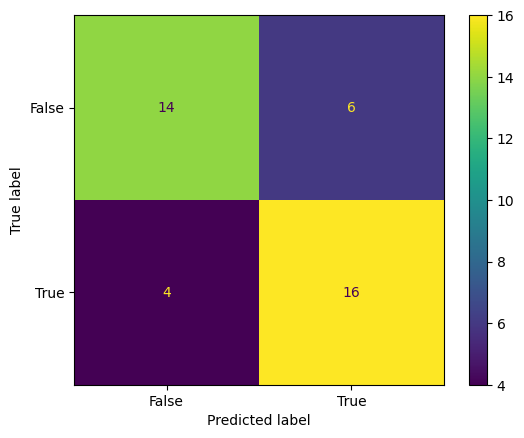

In [51]:
confusion_matrix(big_small_df)

#  Rich - Poor 

In [52]:
context="1. The billionaire was incredibly rich, with more money than he could ever spend. 2. She felt blessed to have a rich family who could support her dreams. 3. The soil in that area is incredibly rich, making it perfect for agriculture. 4. The painting was incredibly detailed and rich in color. 5. The chocolate cake was rich and decadent, perfect for a special occasion.1. He lived a life of luxury, surrounded by opulence and extravagance. 2. Her bank account was always overflowing with an abundance of funds. 3. The mansion was adorned with expensive artwork and furnishings, indicating wealth beyond measure. 4. His wardrobe consisted of designer labels and custom-made suits, displaying his affluence. 5. The private jet waiting on the runway was a clear indication of their prosperity. 6. Their vacation home was situated in an exclusive enclave reserved for the elite. 7. The lavish party was filled with celebrities and high society, showcasing their financial status. 8. The car parked outside was a high-end model known for its luxury and performance. 9. The yacht they sailed on was a behemoth of the sea, a symbol of their immense wealth. 10. The villa they rented for the summer was fit for royalty, complete with a private pool and butler service. 11. The jewelry she wore was adorned with precious gems and metals, indicating her high net worth. 12. The charity event was attended by philanthropists and donors, highlighting their generosity and wealth. 13. The investment portfolio they managed was diverse and profitable, generating significant returns. 14. The watch on his wrist was a limited edition timepiece coveted by collectors, revealing his financial success. 15. The real estate empire they built spanned across multiple countries, a testament to their wealth and power.1. He lived in a run-down apartment with peeling wallpaper and stained carpets. 2. Her clothes were old and tattered, with holes in the sleeves and frayed hems. 3. The family's meals consisted of canned goods and cheap, processed foods. 4. His shoes were worn out and had holes in the soles. 5. Their only mode of transportation was an old, rusty bicycle. 6. The house was small and cramped, with only one bedroom for the whole family. 7. The children didn't have any toys or games to play with, only a few broken items. 8. Their furniture was mismatched and cobbled together from thrift stores and hand-me-downs. 9. The heating didn't work properly, leaving the family cold and shivering in the winter. 10. They had to rely on public transportation to get anywhere, which was often unreliable and slow. 11. The electricity was often shut off due to unpaid bills, leaving them in the dark. 12. They couldn't afford medical care, so they often had to suffer through illnesses without treatment. 13. The neighborhood was rough and dangerous, with high crime rates and dilapidated buildings. 14. They had to wash their clothes by hand because they couldn't afford a washing machine. 15. The school they attended was underfunded and overcrowded, with outdated textbooks and limited resources.1. The poor children were begging for food on the streets. 2. The poor man lived in a shabby hut. 3. The poor have limited access to education. 4. The poor struggle to meet their basic needs. 5. The poor are often marginalized in society."

In [53]:
train_sentences=preprocess_context(context)
len(train_sentences)

40

In [54]:
dictionary=SensePolar('rich_poor.xlsx',train_sentences,'antonyms_file/')
rich_poor_df=create_df(dictionary)
add_values('rich_poor',rich_poor_df,final)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Model imported
Start forwarding the Polar opposites ...
dimensions created
Analyzing the word:  [CLS]
In the context of:  [CLS]  The billionaire was incredibly rich, with more money than he could ever spend
Top:  1
Dimension:  rich<------>poor
Definitions:   <------> 
Value:                      0.5931037


Analyzing the word:  [CLS]
In the context of:  [CLS]  She felt blessed to have a rich family who could support her dreams
Top:  1
Dimension:  rich<------>poor
Definitions:   <------> 
Value: -0.16351168


Analyzing the word:  [CLS]
In the context of:  [CLS]  The soil in that area is incredibly rich, making it perfect for agriculture
Top:  1
Dimension:  rich<------>poor
Definitions:   <------> 
Value: -0.17248744


Analyzing the word:  [CLS]
In the context of:  [CLS]  The painting was incredibly detailed and rich in color
Top:  1
Dimension:  rich<------>poor
Definitions:   <------> 
Value: -1.3321027


Analyzing the word:  [CLS]
In the context of:  [CLS]  The chocolate cake was rich 

Top:  1
Dimension:  rich<------>poor
Definitions:   <------> 
Value:                      0.5068353


Analyzing the word:  [CLS]
In the context of:  [CLS]  The poor man lived in a shabby hut
Top:  1
Dimension:  rich<------>poor
Definitions:   <------> 
Value:                      0.7482386


Analyzing the word:  [CLS]
In the context of:  [CLS]  The poor have limited access to education
Top:  1
Dimension:  rich<------>poor
Definitions:   <------> 
Value:                      3.5711582


Analyzing the word:  [CLS]
In the context of:  [CLS]  The poor struggle to meet their basic needs
Top:  1
Dimension:  rich<------>poor
Definitions:   <------> 
Value:                      1.1385441


Analyzing the word:  [CLS]
In the context of:  [CLS]  The poor are often marginalized in society
Top:  1
Dimension:  rich<------>poor
Definitions:   <------> 
Value:                      2.5242195




,Antonym_pair,F1,RECALL,PRESICION,ACCURACY,Number_of_predictions
0,good-bad,1.000000,1.00,1.000000,1.000,40
1,happy-sad,0.260870,0.15,1.000000,0.575,40
2,hot-cold,0.750000,0.60,1.000000,0.800,40
3,difficult-easy,0.090909,0.05,0.500000,0.500,40
4,big-small,0.761905,0.80,0.727273,0.750,40
5,fast-slow,0.723404,0.85,0.629630,0.675,40
6,rich_poor,0.816327,1.00,0.689655,0.775,40


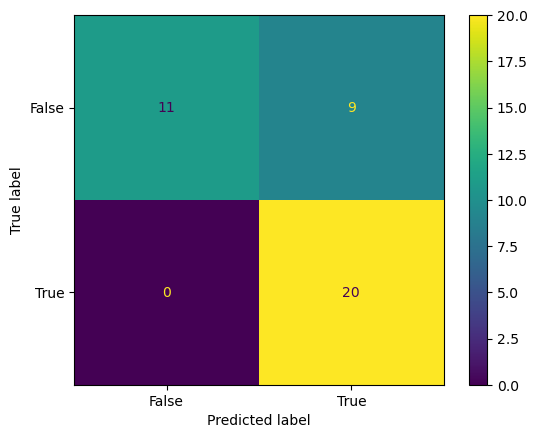

In [55]:
confusion_matrix(rich_poor_df)

#  Love - Hate

In [56]:
context="1. She felt a deep love for her children. 2. Their love for each other was evident in the way they looked at each other. 3. He was consumed by his love for her. 4. Love is the most powerful force in the universe. 5. They fell in love at first sight. 1. The couple shared a deep and unbreakable bond. 2. Their connection was stronger than anything they had ever known. 3. They were two halves of a whole, perfectly matched in every way. 4. Their affection for each other was evident in every gesture and glance. 5. They were inseparable, always by each other's side. 6. Their relationship was built on trust, respect, and understanding. 7. They complemented each other perfectly, like two pieces of a puzzle. 8. The way they looked at each other said more than words ever could. 9. They were each other's rock, always there to support and comfort one another. 10. Their love was a flame that burned bright, never dimming or fading. 11. They shared a connection that transcended time and distance. 12. Their union was a beautiful and sacred thing, to be cherished and nurtured. 13. They were partners in every sense of the word, sharing their joys and sorrows. 14. They had a chemistry that was undeniable, a natural attraction that drew them together. 15. They were a team, working together to overcome any obstacle that came their way.1. She felt a deep and intense anger towards him. 2. Their relationship was marred by a growing sense of resentment. 3. He harbored a strong dislike for his neighbor. 4. She couldn't stand to be in the same room as him. 5. They had a bitter and acrimonious relationship. 6. He held a grudge against her that never seemed to fade. 7. She felt a burning anger that consumed her whenever she thought of him. 8. They had an animosity towards each other that was palpable. 9. He had a deep-seated aversion to anything that reminded him of his past. 10. She felt a loathing for him that she could not explain. 11. They had a mutual antipathy that had been simmering for years. 12. He felt a contempt for his boss that he struggled to hide. 13. She had a disdain for anyone who didn't share her beliefs. 14. They had a seething resentment towards each other that never seemed to dissipate. 15. He felt a repugnance towards his former friend that he couldn't shake.1. He felt a burning hate towards his ex-wife. 2. Hatred is a destructive emotion that can consume a person. 3. They had a mutual hate for each other that was palpable. 4. She couldn't hide her hate for her boss. 5. Hatred is often a result of deep-seated resentment."

In [57]:
train_sentences=preprocess_context(context)
len(train_sentences)

40

In [58]:
dictionary=SensePolar('love_hate.xlsx',train_sentences,'antonyms_file/')
love_hate_df=create_df(dictionary)
add_values('love-hate',love_hate_df,final)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Model imported
Start forwarding the Polar opposites ...
dimensions created
Analyzing the word:  [CLS]
In the context of:  [CLS]  She felt a deep love for her children
Top:  1
Dimension:  love<------>hate
Definitions:   <------> 
Value: -0.22981183


Analyzing the word:  [CLS]
In the context of:  [CLS]  Their love for each other was evident in the way they looked at each other
Top:  1
Dimension:  love<------>hate
Definitions:   <------> 
Value: -0.019183254


Analyzing the word:  [CLS]
In the context of:  [CLS]  He was consumed by his love for her
Top:  1
Dimension:  love<------>hate
Definitions:   <------> 
Value:                      0.34881142


Analyzing the word:  [CLS]
In the context of:  [CLS]  Love is the most powerful force in the universe
Top:  1
Dimension:  love<------>hate
Definitions:   <------> 
Value: -0.76325685


Analyzing the word:  [CLS]
In the context of:  [CLS]  They fell in love at first sight
Top:  1
Dimension:  love<------>hate
Definitions:   <------> 
Value: -0.

Top:  1
Dimension:  love<------>hate
Definitions:   <------> 
Value:                      0.7376232




,Antonym_pair,F1,RECALL,PRESICION,ACCURACY,Number_of_predictions
0,good-bad,1.000000,1.00,1.000000,1.000,40
1,happy-sad,0.260870,0.15,1.000000,0.575,40
2,hot-cold,0.750000,0.60,1.000000,0.800,40
3,difficult-easy,0.090909,0.05,0.500000,0.500,40
4,big-small,0.761905,0.80,0.727273,0.750,40
5,fast-slow,0.723404,0.85,0.629630,0.675,40
6,rich_poor,0.816327,1.00,0.689655,0.775,40
7,love-hate,0.900000,0.90,0.900000,0.900,40


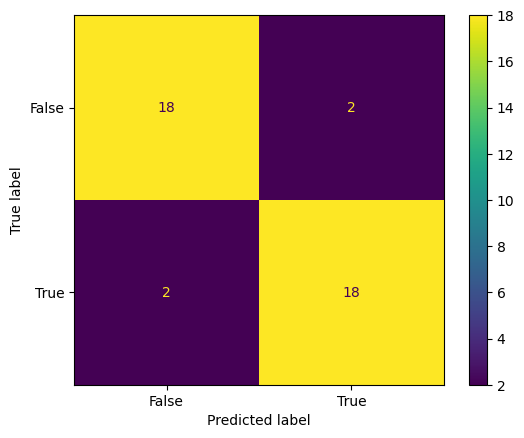

In [59]:
confusion_matrix(love_hate_df)

# strong - weak

In [60]:
context="1. He possessed an unwavering determination that propelled him forward. 2. Her willpower was unrelenting, even in the face of adversity. 3. He had a fierce resolve that never faltered. 4. Her fortitude allowed her to overcome any obstacle. 5. He was steadfast in his beliefs, never swayed by outside influences. 6. She had an indomitable spirit that refused to be broken. 7. He displayed a powerful conviction that inspired others to follow. 8. Her perseverance was unmatched, always pushing herself to the limit. 9. He had an ironclad discipline that kept him focused on his goals. 10. She possessed an inner strength that radiated from within. 11. He was unyielding in his pursuit of excellence. 12. Her tenacity was awe-inspiring, never giving up despite setbacks. 13. He had an unshakeable confidence that propelled him to success. 14. She displayed a resolute determination that was unmatched. 15. His unwavering courage in the face of danger was truly remarkable.1. She has a strong determination to succeed. 2. He lifted the heavy weight with his strong arms. 3. The athlete has a strong chance of winning the race. 4. The foundation of the building must be strong to withstand earthquakes. 5. She has a strong personality and is not easily swayed. 1. The bridge was weak and collapsed under the weight of the truck. 2. His immune system was weak and he fell sick often. 3. The team's defense was weak and they lost the game. 4. She has a weak voice and is often not heard in meetings. 5. The battery was weak and needed to be replaced.1. The fabric was fragile and easily tore. 2. The plant was delicate and required constant care. 3. The threadbare sweater was in danger of falling apart. 4. The rickety chair wobbled and creaked under his weight. 5. The tiny bird's wings were frail and delicate. 6. The old man's grip was feeble and weak. 7. The thin ice cracked under the weight of the skater. 8. The rusted chain was brittle and easily snapped. 9. The sickly baby was frail and weak. 10. The shallow stream was easily crossed. 11. The dim light was faint and barely visible. 12. The dying flower was wilting and drooping. 13. The cracked glass was fragile and easily shattered. 14. The thin paper tore easily in his hands. 15. The faded photograph was dull and lacked vibrancy."

In [61]:
train_sentences=preprocess_context(context)
len(train_sentences)

40

In [62]:
dictionary=SensePolar('strong_weak.xlsx',train_sentences,'antonyms_file/')
strong_weak_df=create_df(dictionary)
add_values('strong-weak',strong_weak_df,final)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Model imported
Start forwarding the Polar opposites ...
dimensions created
Analyzing the word:  [CLS]
In the context of:  [CLS]  He possessed an unwavering determination that propelled him forward
Top:  1
Dimension:  strong<------>weak
Definitions:   <------> 
Value: -0.79852104


Analyzing the word:  [CLS]
In the context of:  [CLS]  Her willpower was unrelenting, even in the face of adversity
Top:  1
Dimension:  strong<------>weak
Definitions:   <------> 
Value: -0.20752946


Analyzing the word:  [CLS]
In the context of:  [CLS]  He had a fierce resolve that never faltered
Top:  1
Dimension:  strong<------>weak
Definitions:   <------> 
Value: -0.7839707


Analyzing the word:  [CLS]
In the context of:  [CLS]  Her fortitude allowed her to overcome any obstacle
Top:  1
Dimension:  strong<------>weak
Definitions:   <------> 
Value: -0.84137744


Analyzing the word:  [CLS]
In the context of:  [CLS]  He was steadfast in his beliefs, never swayed by outside influences
Top:  1
Dimension:  stro

,Antonym_pair,F1,RECALL,PRESICION,ACCURACY,Number_of_predictions
0,good-bad,1.000000,1.00,1.000000,1.000,40
1,happy-sad,0.260870,0.15,1.000000,0.575,40
2,hot-cold,0.750000,0.60,1.000000,0.800,40
3,difficult-easy,0.090909,0.05,0.500000,0.500,40
4,big-small,0.761905,0.80,0.727273,0.750,40
5,fast-slow,0.723404,0.85,0.629630,0.675,40
6,rich_poor,0.816327,1.00,0.689655,0.775,40
7,love-hate,0.900000,0.90,0.900000,0.900,40
8,strong-weak,0.950000,0.95,0.950000,0.950,40


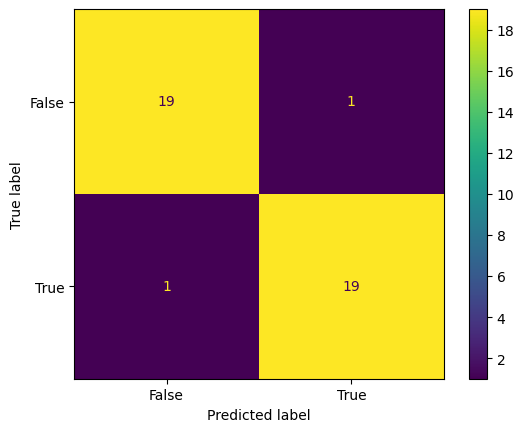

In [63]:
confusion_matrix(strong_weak_df)

# old - new

In [64]:
context="1. The antique car was a relic from a bygone era. 2. The historic building had stood for centuries. 3. The classic novel was a timeless masterpiece. 4. The vintage record player was a treasure from the past. 5. The ancient artifact was a fascinating piece of history. 6. The traditional recipe had been passed down for generations. 7. The weathered barn had weathered many storms. 8. The traditional dance had been performed for hundreds of years. 9. The nostalgic photograph captured a moment in time. 10. The timeless painting was a work of art. 11. The traditional clothing was a symbol of cultural heritage. 12. The rustic cabin had a cozy, old-world charm. 13. The historic document had been preserved for centuries. 14. The classic film was a beloved masterpiece of cinema. 15. The vintage typewriter was a reminder of a simpler time.1. The old man sat on the bench, feeding the pigeons. 2. The old book had yellowed pages and a musty smell. 3. The old car had a classic design and was highly sought after. 4. The old house had a charm that modern houses lacked. 5. The old bridge was in need of repair. 1. The latest smartphone had state-of-the-art features. 2. The innovative technology was cutting-edge and advanced. 3. The freshly-painted walls gave the room a modern look. 4. The recently-launched brand had a distinct identity and style. 5. The current fashion trends were fresh and exciting. 6. The latest model of the car had sleek lines and a modern design. 7. The contemporary art exhibit showcased new artists and styles. 8. The newly-constructed building had modern architecture and amenities. 9. The current music scene was vibrant and experimental. 10. The modern kitchen appliances had advanced features and functions. 11. The updated software had improved performance and security. 12. The current political climate was marked by new ideas and policies. 13. The young company had a fresh perspective and innovative ideas. 14. The recently-released movie had groundbreaking special effects. 15. The innovative gadget had futuristic features and functions.1. I'm excited to try out my new recipe tonight. 2. The new student just arrived in class. 3. The bookstore just got in some new novels. 4. I need to buy a new pair of shoes. 5. The city is planning to build a new park. "

In [65]:
train_sentences=preprocess_context(context)
len(train_sentences)

40

In [66]:
dictionary=SensePolar('old_new.xlsx',train_sentences,'antonyms_file/')
old_new_df=create_df(dictionary)
add_values('old-new',old_new_df,final)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Model imported
Start forwarding the Polar opposites ...
dimensions created
Analyzing the word:  [CLS]
In the context of:  [CLS]  The antique car was a relic from a bygone era
Top:  1
Dimension:  old<------>new
Definitions:   <------> 
Value: -0.7740973


Analyzing the word:  [CLS]
In the context of:  [CLS]  The historic building had stood for centuries
Top:  1
Dimension:  old<------>new
Definitions:   <------> 
Value: -0.46058637


Analyzing the word:  [CLS]
In the context of:  [CLS]  The classic novel was a timeless masterpiece
Top:  1
Dimension:  old<------>new
Definitions:   <------> 
Value:                      0.3187213


Analyzing the word:  [CLS]
In the context of:  [CLS]  The vintage record player was a treasure from the past
Top:  1
Dimension:  old<------>new
Definitions:   <------> 
Value: -0.4287333


Analyzing the word:  [CLS]
In the context of:  [CLS]  The ancient artifact was a fascinating piece of history
Top:  1
Dimension:  old<------>new
Definitions:   <------> 
Value:

,Antonym_pair,F1,RECALL,PRESICION,ACCURACY,Number_of_predictions
0,good-bad,1.000000,1.00,1.000000,1.000,40
1,happy-sad,0.260870,0.15,1.000000,0.575,40
2,hot-cold,0.750000,0.60,1.000000,0.800,40
3,difficult-easy,0.090909,0.05,0.500000,0.500,40
4,big-small,0.761905,0.80,0.727273,0.750,40
5,fast-slow,0.723404,0.85,0.629630,0.675,40
6,rich_poor,0.816327,1.00,0.689655,0.775,40
7,love-hate,0.900000,0.90,0.900000,0.900,40
8,strong-weak,0.950000,0.95,0.950000,0.950,40
9,old-new,0.761905,0.80,0.727273,0.750,40


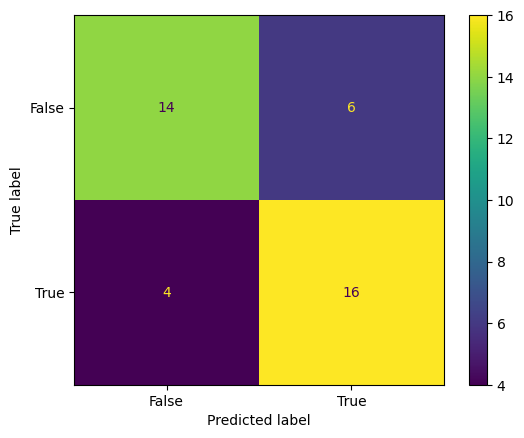

In [67]:
confusion_matrix(old_new_df)

In [68]:
final


,Antonym_pair,F1,RECALL,PRESICION,ACCURACY,Number_of_predictions
0,good-bad,1.000000,1.00,1.000000,1.000,40
1,happy-sad,0.260870,0.15,1.000000,0.575,40
2,hot-cold,0.750000,0.60,1.000000,0.800,40
3,difficult-easy,0.090909,0.05,0.500000,0.500,40
4,big-small,0.761905,0.80,0.727273,0.750,40
5,fast-slow,0.723404,0.85,0.629630,0.675,40
6,rich_poor,0.816327,1.00,0.689655,0.775,40
7,love-hate,0.900000,0.90,0.900000,0.900,40
8,strong-weak,0.950000,0.95,0.950000,0.950,40
9,old-new,0.761905,0.80,0.727273,0.750,40
